## ___Домашнее задание №1___
### ___Компьютерное моделирование огневого боя.___
**Вариант №7**

__***Дано:***__
***
___Для красных (команда 1):___
* Начальная численность:  $ n ^{к} = 150 $ 
* Скорострельность:  $ S ^ {к} = 6 $ выстр./мин 
* Вероятность порожения:  $ W ^ {к} = 0.7 $ 
***
___Для синих (команда 2):___
* Начальная численность:  $ n ^{с} = 200 $ 
* Скорострельность:  $ S ^ {с} = 5 $ выстр./мин 
* Вероятность порожения:  $ W ^ {с} = 0.4 $ 
***

In [2]:
#Запись данных в программу
n_red = 150 #Начальная численность красных
S_red = 6 # Скорострельность красных
W_red = 0.7 # Вероятность порожения красных
#
n_blue = 200 #Начальная численность синих
S_blue = 5 # Скорострельность синих
W_blue = 0.4 # Вероятность порожения синих

***
***1) Эффективная скорострельность (ЭС):***

In [3]:
lambda_red = S_red * W_red #ЭС красных
#
lambda_blue = S_blue * W_blue #ЭС синих
from IPython.display import display, Math, Latex
print("Эффективная скорострельность красных:")
display(Math(r'\Lambda ^ {к} = %.3f' % lambda_red))
print("Эффективная скорострельность синих:")
display(Math(r'\Lambda ^ {с} = %.3f' % lambda_blue)) 

Эффективная скорострельность красных:


<IPython.core.display.Math object>

Эффективная скорострельность синих:


<IPython.core.display.Math object>

***
___2) Коэффициент преимущества $ \chi $ красных (стороны 1)___ 

In [9]:
chi = (n_red/n_blue) * pow(lambda_red/lambda_blue, 0.5)
print("Коэффициент преимущества красных:")
display(Math(r'\chi = %.3f' % chi))

Коэффициент преимущества красных:


<IPython.core.display.Math object>

___
___3) График убывания численности сторон в относительных единицах___

In [29]:
import math
def m_1(t): return math.cosh(t) - (1/chi)*math.sinh(t)
def m_2(t): return math.cosh(t) - (chi)*math.sinh(t)
i = 0
T = [0]
M_1 = [m_1(T[i])]
M_2 = [m_2(T[i])]
while (M_2[i] >= 0) and (M_1[i] >= 0):
    T.append(T[i] + 0.1)
    i += 1
    M_1.append(m_1(T[i]))
    M_2.append(m_2(T[i]))

Text(0, 0.5, 'm')

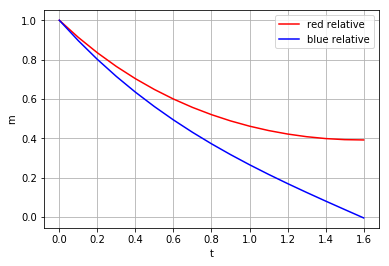

In [52]:
import matplotlib.pyplot as plt
plt.plot(T, M_1, label = 'red relative', color = 'red')
plt.plot(T, M_2, label = 'blue relative', color = 'blue')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('m')

***
___4) Фазовая диограмма боя в относительных и абсолютных единицах___

В относительных единицах:

Text(0, 0.5, 'm_blue')

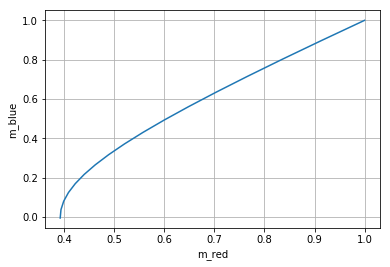

In [62]:
plt.plot(M_1, M_2)
plt.grid()
plt.xlabel('m_red')
plt.ylabel('m_blue')

В абсолютных единицах:

In [60]:
M_red = [a * n_red for a in M_1]
M_blue = [a * n_blue for a in M_2]

Text(0, 0.5, 'm_blue')

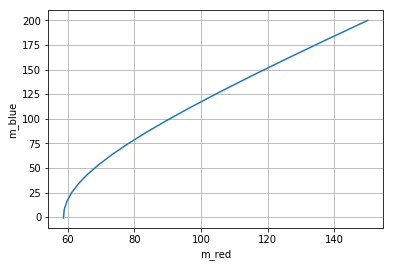

In [68]:
plt.plot(M_red, M_blue)
plt.grid()
plt.xlabel('m_red')
plt.ylabel('m_blue')

___
___5) Момент конца боя при заданных относительных потерях стороны 2 (синих). Расход боеприпасов стороны 1 (красных) на одну установку___

In [107]:
tau_rel = math.log(pow((chi + 1)/(chi - 1), 0.5)) # От. время конца боя
tau = tau_rel/(pow((lambda_red*lambda_blue), 0.5)) #Аб. вреия конца боя
N_red = S_red * tau # Расход БП стороны 1 (красных) на одну устан.
print("Относительное время конца боя")
display(Math(r'\bar \tau = %.3f' % tau_rel))
print("Абсолюьное время конца боя, в сек")
display(Math(r'\tau = %.1f\ с' % (tau*60)))
print("Расход боеприпасов на одну установку у красных (сторона 1):")
display(Math(r'N_{к} = %.0f ' % N_red))

Относительное время конца боя


<IPython.core.display.Math object>

Абсолюьное время конца боя, в сек


<IPython.core.display.Math object>

Расход боеприпасов на одну установку у красных (сторона 1):


<IPython.core.display.Math object>